# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Josua Pane
- **Email:** panejosua@gmail.com
- **ID Dicoding:** josuapane13

## Menentukan Pertanyaan Bisnis

- Pada musim apa jasa rental sepeda paling banyak digunakan?
- Bagaimana kondisi cuaca dan temperatur mempengaruhi jumlah penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("https://raw.githubusercontent.com/josuapane13/ProyekAnalisisData/main/dataset/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/josuapane13/ProyekAnalisisData/main/dataset/hour.csv")


Informasi Data :
hour.csv and day.csv mempunyai field sebagai berikut, kecuali hr yang tidak ada di day.csv
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

Sebagai contoh disini saya gunakan satu dataset saja yang mewakili yaitu day.csv

### Assessing Data

In [6]:
# Cek duplikasi dan missing values
print("Missing values pada tiap kolom pada dataframe day_df: ")
print(day_df.isna().sum())
print("Jumlah duplikasi dataframe day: ", day_df.duplicated().sum())

Missing values pada tiap kolom pada dataframe day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi dataframe day:  0


In [7]:
# Cek duplikasi dan missing values
print("Missing values pada tiap kolom pada dataframe hour_df: ")
print(hour_df.isna().sum())
print("Jumlah duplikasi dataframe day: ", hour_df.duplicated().sum())

Missing values pada tiap kolom pada dataframe hour_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi dataframe day:  0


Menilai dataframe dan memilih yang mana yang akan digunakan

In [9]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Memilih dataframe yang mana yang digunakan

In [8]:
hour_df.groupby('dteday')['cnt'].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

Bisa kita lihat bahwa setelah dikelompokkan berdasarkan tanggal, jumlah baris datanya sama seperti dataframe day_df, yaitu 731. Dan jumlah cnt hour_df setelah dikelompokkan per tanggal, juga sama dengan dataframe day_df.

In [10]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Jadi, kita akan gunakan dataframe hour_df untuk sebagian besar proses analisis data.

### Cleaning Data

In [11]:
# Konversi kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Ubah nama atribut dan tipe data menjadi 'category'

In [12]:
kolom_day_rename = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
day_df.rename(columns=kolom_day_rename, inplace=True)

kolom_hour_rename = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'hr': 'hour', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
hour_df.rename(columns=kolom_hour_rename, inplace=True)

In [13]:
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weather'] = day_df['weather'].astype('category')

hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['hour'] = hour_df['hour'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

In [14]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: categ

Ubah category sesuai dengan info pada dataset (dalam file readme)

In [15]:
day_df['season'] = day_df['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
day_df['year'] = day_df['year'].map({0: 2011, 1: 2012})
day_df['month'] = day_df['month'].apply(lambda x: calendar.month_name[x])
day_df['holiday'] = day_df['holiday'].map({0: 'no', 1: 'yes'})
day_df['weekday'] = day_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
day_df['workingday'] = day_df['workingday'].map({0: 'no', 1: 'yes'})

hour_df['season'] = hour_df['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['year'] = hour_df['year'].map({0: 2011, 1: 2012})
hour_df['month'] = hour_df['month'].apply(lambda x: calendar.month_name[x])
hour_df['holiday'] = hour_df['holiday'].map({0: 'no', 1: 'yes'})
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df['workingday'] = hour_df['workingday'].map({0: 'no', 1: 'yes'})

Kembalikan nilai atribut sebelum di normalisasi

In [16]:
# Mengembalikan nilai temperature, atemp, hum, dan windspeed ke skala aslinya

day_df['temperature'] = day_df['temperature'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['humidity'] = day_df['humidity'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

hour_df['temperature'] = hour_df['temperature'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['humidity'] = hour_df['humidity'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

## Exploratory Data Analysis (EDA)

### Explore pengguna rental sepeda berdasarkan beberapa kriteria

Berdasarkan musim

In [ ]:
hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
springer,60622,410726,471348


Berdasarkan kelompok bulan

In [ ]:
hour_df.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


Berdasarkan cuaca

In [ ]:
hour_df.groupby(by="weather").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
weather,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Berdasarkan jam

In [17]:
hour_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Berdasarkan hari libur atau tidak

In [ ]:
day_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
holiday,,,
no,597658,2616586,3214244
yes,22359,56076,78435


Korelasi antar atribut dan heatmap correlation

<ipython-input-55-2eb6b7126cac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


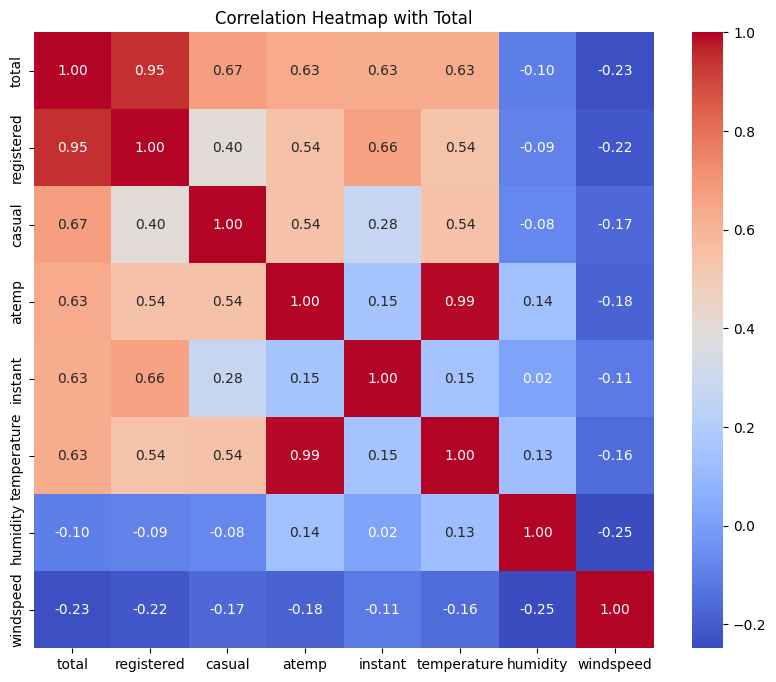

In [ ]:
correlation_matrix = day_df.corr()
correlation_with_total = correlation_matrix['total']
correlation_with_total_sorted = correlation_with_total.sort_values(ascending=False)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[correlation_with_total_sorted.index, correlation_with_total_sorted.index], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Total')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa jasa rental sepeda paling banyak digunakan?

Menggunakan barplot agar mudah dibaca untuk melihat pada musim apa jasa rental sepeda paling banyak digunakan

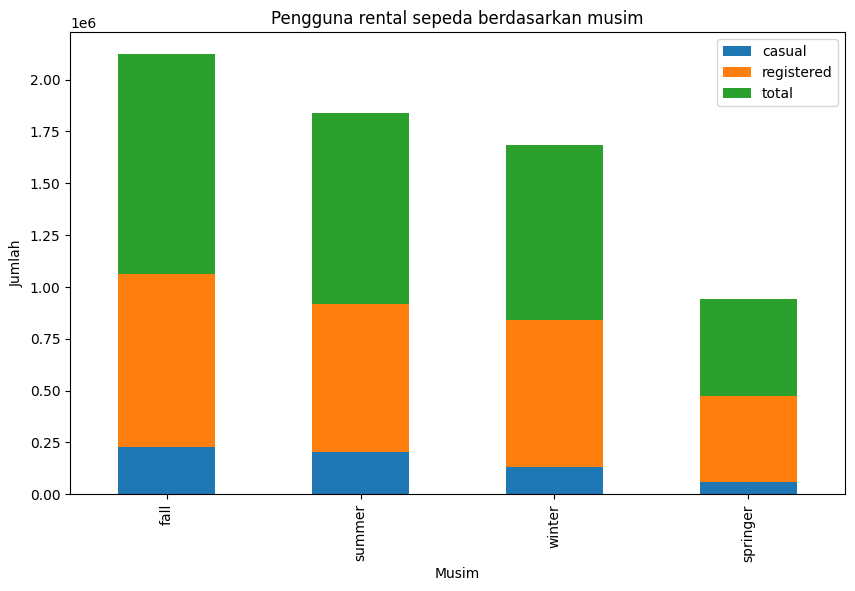

In [ ]:
musim = day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
musim.plot(kind='bar', stacked=True, ax=ax)

plt.title('Pengguna rental sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')

plt.show()

Didapati pada musim fall pengguna rental sepeda paling banyak, diikuti dengan musim summer, lalu musim winter, dan musim springer yang paling sedikit

### Pertanyaan 2: Bagaimana kondisi cuaca dan temperature mempengaruhi jumlah penggunaan sepeda?

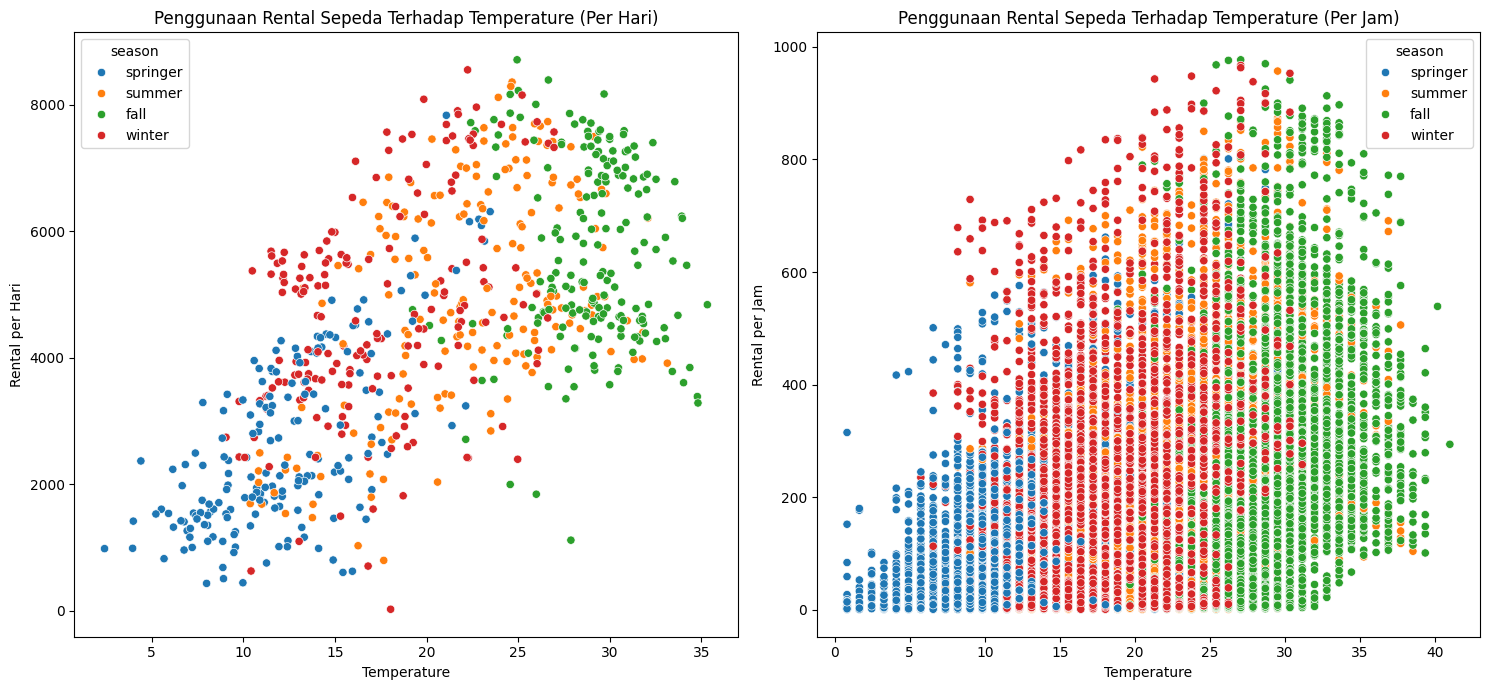

In [18]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=day_df, x='temperature', y='total', hue='season', legend='full')
plt.title('Penggunaan Rental Sepeda Terhadap Temperature (Per Hari)')
plt.xlabel('Temperature')
plt.ylabel('Rental per Hari')

plt.subplot(1, 2, 2)
sns.scatterplot(data=hour_df, x='temperature', y='total', hue='season', legend='full')
plt.title('Penggunaan Rental Sepeda Terhadap Temperature (Per Jam)')
plt.xlabel('Temperature')
plt.ylabel('Rental per Jam')

plt.tight_layout()
plt.show()

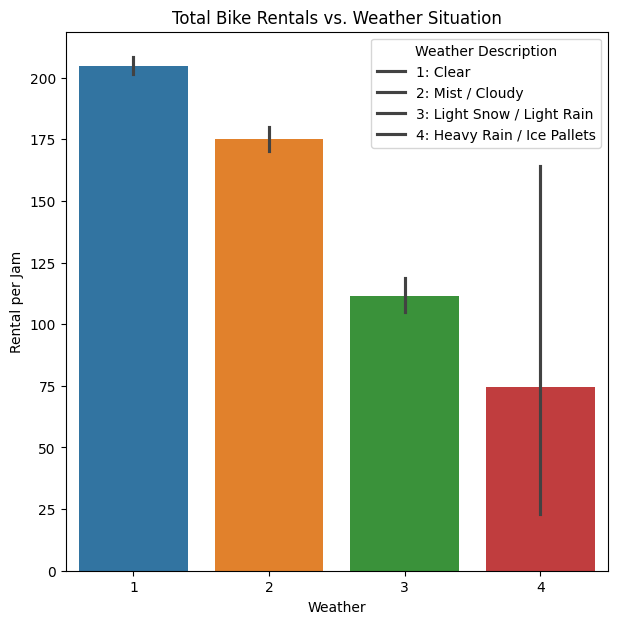

In [19]:
legend_labels = {
    1: 'Clear',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Light Rain',
    4: 'Heavy Rain / Ice Pallets'
}
plt.figure(figsize=(7, 7))
sns.barplot(data=hour_df, x='weather', y='total', hue='weather')
plt.title('Total Bike Rentals vs. Weather Situation')
plt.xlabel('Weather')
plt.ylabel('Rental per Jam')
plt.legend(title='Weather Description', labels=[f'{key}: {value}' for key, value in legend_labels.items()], loc='upper right')

plt.show()

Rata-rata Total Rental Sepeda berdasarkan temperatur:
Terdapat tren positif yang jelas menunjukkan bahwa seiring dengan peningkatan suhu, jumlah total penyewaan sepeda juga meningkat. Hubungan ini konsisten di berbagai musim, dengan musim yang lebih hangat seperti musim panas (summer) dan musim fall menunjukkan jumlah penyewaan yang lebih tinggi pada suhu yang sebanding.

Rata-rata Total Rental Sepeda berdasarkan cuaca:
Rata-rata total penyewaan mengalami penurunan saat situasi cuaca memburuk (indeks 1-3, di mana 1 adalah cuaca terbaik dan 3 adalah salju ringan atau hujan ringan)

## Conclusion

- Berdasarkan graf visualisasi barplot, dapat disimpulkan bahwa pengguna terbanyak rental sepeda yaitu pada musim Fall. Hal ini juga menunjukkan ada kecenderungan preferensi yang jelas untuk bulan-bulan yang lebih hangat untuk menyewa sepeda.
- Berdasarkan visualisasi scatterplot, dapat disimpulkan bahwa pengguna rental sepeda cenderung meningkat pada sebaran temperatur normal (25-30). Sebaran scatter plot ini juga menunjukkan bawha pada musim spring dan summer (dalam indeks warna biru dan oranye), pengguna rental sepeda lebih banyak dibandingkan pada musim yang lebih dingin(fall dan winter).